In [58]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import math
import matplotlib.pyplot as plt

In [59]:
from sklearn.preprocessing import OneHotEncoder # We don't use this but I point out where you *could*
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [60]:
import nltk
import spacy
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from nltk import ngrams, FreqDist

lemmatizer = WordNetLemmatizer()
tokenizer = ToktokTokenizer()

In [61]:
#stopwords.words('english')

In [62]:
import re
import string
import unicodedata
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS

In [63]:
urls = [
    'https://www.ucl.ac.uk/bartlett/casa/people/staff',
    'http://localhost:8898/lab/workspaces/auto-B/tree/work/live/Live.ipynb'
]

url.split('/')

for u in urls:
    print(u)
    del(m)
    m = re.match(r'^([^:]+)://([^\/]+)/(.*)$', u) #([^:\.]+):?(\d*)/', u)
    if m:
        protocol = m.group(1)
        port = m.group(2)
        path = m.group(3)
        print(f"{protocol}, {port}, {path}")
    else:
        print(f"No Match: {u}")

https://www.ucl.ac.uk/bartlett/casa/people/staff
https, www.ucl.ac.uk, bartlett/casa/people/staff
http://localhost:8898/lab/workspaces/auto-B/tree/work/live/Live.ipynb
http, localhost:8898, lab/workspaces/auto-B/tree/work/live/Live.ipynb


In [64]:
gdf = gpd.read_feather('data/geo/2022-09-10-listings.geofeather')

In [65]:
gdf.description.sample(5)

40313    Large Self-Contained Studio Flat NW2. Own entrance, please note it’s on the main road. <br />*Available short and long term*<br />Newly refurbished this flat will suit those looking for a comfortable stay whether you're here to work, study or on holiday this apartment is a sure bet with excellen...
35924    A beautiful designer home, spacious, warm and comfortable. A cosy double room with a comfy double bed, wardrobe, TV with freeview channels.  Great neighbourhood  with restaurants, boutiques, pubs and local shops. Tube station is 5 min walk. 15 mins by tube to Oxford Street/Regent Street area.<br...
60707    Our beautiful period house dates from 1860 and is in the heart of leafy Highbury.<br /><br />It has a recently designed open-plan kitchen-diner, reception room, 4 bedrooms and 3 bathrooms. It also has an exceptionally large garden, perfect for lounging and playing. We are well equipped for kids....
25350    Welcome to my home! My modern 2 bedroom, 2 bathroom apartment, i

In [66]:
print(pd.options.display.max_colwidth)
pd.options.display.max_colwidth=300

300


In [67]:
gdf = gdf.to_crs(epsg=27700)

In [80]:
trendy = gdf[gdf.description.str.contains(r'trend(?:y|iest)', regex=True, na=False)]
trendy = trendy[trendy.price < 1000]

In [69]:
boros = gpd.read_file('data/geo/Boroughs.gpkg')
water = gpd.read_file('data/geo/Water.gpkg')

(175000.0, 190000.0)

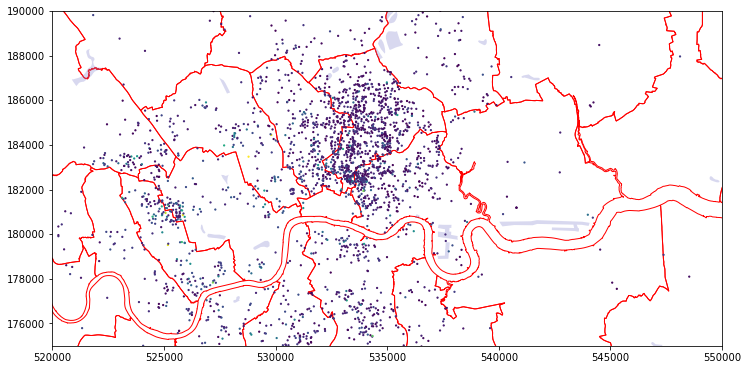

In [81]:
f,ax = plt.subplots(1,1,figsize=(12,8))
boros.plot(ax=ax, edgecolor='r', facecolor='none')
water.plot(ax=ax, edgecolor='none', facecolor=(.5, .5, .8, .3))
trendy.plot(ax=ax, column='price', cmap='viridis', s=1.5)
ax.set_xlim(520000,550000)
ax.set_ylim(175000,190000)

In [78]:
trendy.price.max()

2280.0

<AxesSubplot:ylabel='Frequency'>

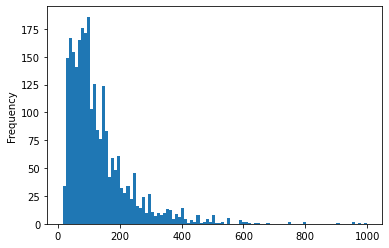

In [82]:
trendy.price.plot.hist(bins=100)

In [84]:
trendy.sample(5, random_state=42)[['description']]

,description
54807,"This beautiful 3 bed apartment is located in the trendy neighbourhood of Arsenal, London. <br /><br />It is in a great location close to the Emirates if you wanted to soak in a game-day atmosphere like no other. <br /><br />The area has some trendy and well-priced bars and restaurants nearby, so..."
52512,"Brilliant flat centrally located in trendy Wandsworth Common. Just a 2 minute walk to stunning Wandsworth Common and its large green spaces! Ideal for reaching the numerous bars and restaurants of Balham, Clapham and Wandsworth.<br /><br />Perfect for families or groups of friends up to 6 people..."
23031,"Come and stay in our lovely little victorian flat this Christmas / New Year. Located a stones-throw away from the popular and trendy Victoria Park, London Fields & the famous Broadway market, You will have all the comfort of home on the doorstep of the bustling East London community. <br /><br /..."
42784,"Recently renovated, this 1st floor charming Victorian flat is perfectly located for all the benefits of London. Situated just a 15-minute journey into central London and within walking distance to shops, restaurants and outdoor spaces. Walthamstow is a part of the remarkable East London movement..."
12445,"Our modern penthouse apartment is situated right on Regents Canal, in cool and creative East London. The flat has stunning views over the canal, which can be enjoyed from deck chairs and outdoor seating on the L shaped balcony.<br />The local area is packed with restaurants and bars and we are o..."


In [87]:
doc = trendy.loc[54807].description

In [89]:
soup = BeautifulSoup(doc)

In [91]:
soup.get_text(separator=' ')

'This beautiful 3 bed apartment is located in the trendy neighbourhood of Arsenal, London.  It is in a great location close to the Emirates if you wanted to soak in a game-day atmosphere like no other.  The area has some trendy and well-priced bars and restaurants nearby, so feel free to express your inner foodie.  The area has great links to the underground, so getting to most places in London is easy. The flat itself has a fully equipped kitchen and a balcony with great views of London. The space Amenities:  24/7 guest support Professionally cleaned Hotel-quality bed linen and towels 24/7 check-in as there is a lockbox with the keys Kitchen: Fully equipped Oven Stove Refrigerator Microwave Toaster Kettle Washing Machine  Dining Table Bedroom 1:  Double Bed Large Wardrobe Balcony Bedroom 2: Double Bed'

In [92]:
help(gdf.apply)

Help on method apply in module geopandas.geodataframe:

apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs) method of geopandas.geodataframe.GeoDataFrame instance
    Two-dimensional, size-mutable, potentially heterogeneous tabular data.
    
    Data structure also contains labeled axes (rows and columns).
    Arithmetic operations align on both row and column labels. Can be
    thought of as a dict-like container for Series objects. The primary
    pandas data structure.
    
    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, dataclass or list-like objects. If
        data is a dict, column order follows insertion-order. If a dict contains Series
        which have an index defined, it is aligned by its index.
    
        .. versionchanged:: 0.25.0
           If data is a list of dicts, column order follows insertion-order.
    
    index : Index or array-like


In [ ]:
def remove_html(x):
    return BeautifulSoup(x).get_text(separator=' ') if x != None else None

In [97]:
gdf['description_stripped'] = gdf.description.apply(lambda x: BeautifulSoup(x).get_text(separator=' ') if x != None else None)

/opt/conda/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [98]:
gdf['description_stripped'].sample(5, random_state=42)

62042    A surprisingly peaceful street in the heart of brixton. 2 minutes walk from Acre lane, 5 minutes from Brixton market. Also easy walking distance to popular venues such as Electric Brixton, and the O2. Also a perfect base to explore central London as the tube station can be reached in 7 minutes w...
61056                                         Classic London apartment, it has a sofa bed in the living room, a bedroom with a single bed, a bedroom with a double bed, fully equipped kitchen, all beds assembled and with towels, we have several nearby restaurants, supermarkets, parks and tourist attractions.
63626    Peaceful room, in a shared home. Access to  living room, dining area, kitchen, conservatory and bathroom.  Beautiful garden with wild flowers, pond and plenty of seating areas for relaxing and outside dining.  A small walk from nonsuch mansion and gardens.  A short walk to Cheam village 15 mins ...
24735    Lovely 2 bedroom ground floor flat  in a Victorian house, with p

In [100]:
corpus = gdf.description_stripped.str.lower().fillna(' ').values
print(corpus[0:3])
cvectorizer = CountVectorizer(ngram_range=(1,3))
cvectorizer.fit(corpus)

["my bright double bedroom with a large window has a relaxed feeling! it comfortably fits one or two and is centrally located just two blocks from finsbury park. enjoy great restaurants in the area and easy access to easy transport tubes, trains and buses. babies and children of all ages are welcome. the space hello everyone, i'm offering my lovely double bedroom in finsbury park area (zone 2) for let in a shared apartment.  you will share the apartment with me and it is fully furnished with a self catering kitchen. two people can easily sleep well as the room has a queen size bed. i also have a travel cot for a baby for guest with small children.  i will require a deposit up front as a security gesture on both our parts and will be given back to you when you return the keys.  i trust anyone who will be responding to this add would treat my home with care and respect .  best wishes  alina gue"
 "lots of windows and light.  st luke's gardens are at the end of the block, and the river no

CountVectorizer(ngram_range=(1, 3))

In [105]:
term = 'trendy'
pd.options.display.max_colwidth=750
# Find the vocabulary mapping for the term
print(f"Vocabulary mapping for {term} is {cvectorizer.vocabulary_[term]}")
# How many times is it in the data
print(f"Found {gdf.description_stripped.str.contains(term).sum():,} rows containing {term}")
# Print the descriptions containing the term
gdf[gdf.description_stripped.str.contains(term, na=False)].description_stripped

Vocabulary mapping for trendy is 2449268
Found 2,418 rows containing trendy


12       A very large and light one bedroom Victorian apartment with original wooden floors throughout and heaps of style, 60m2. Comfortably fits a couple, and is a short walk from trendy areas of Portobello and Westfield entertainment and shopping, three tube lines, train and bus. The space Ground floor of a Victorian villa, a very large, airy and sunny apartment. It has one double bedroom with a very large double bed, spacious living room and separate kitchen. The place is within walking distance from great shopping, on a quiet residential street in Shepherds Bush, just off Goldhawk Road.  There is a lovely neighbourhood with cafes and shops just across the road - Hammersmith Grove.  The flat is also not far from Holland Park shops and cafes (...
28       Newly decorated, stylish apartment in a quiet area of trendy Shoreditch.  This cool, comfortable haven provides you with all that you need. Central location with secure & modern facilities, a private balcony and moments from all Lon

In [106]:
cvtcorpus = cvectorizer.transform(corpus)
cvtcorpus # cvtcorpus for count-vectorised transformed corpus

<68741x2723484 sparse matrix of type '<class 'numpy.int64'>'
	with 18430054 stored elements in Compressed Sparse Row format>

In [108]:
doc_df = pd.DataFrame(cvtcorpus[0].T.todense(), 
                      index=cvectorizer.get_feature_names_out(), columns=["Counts"]
                     ).sort_values('Counts', ascending=False)
doc_df.tail(10)

,Counts
floating home,0
floating house on,0
floating home climb,0
floating home completed,0
floating home in,0
floating home on,0
floating hotel,0
floating hotel space,0
floating house,0
𝘁𝗵𝗶𝘀 lovely flat,0
